In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
data=pd.read_csv("/kaggle/input/titanic/train.csv")
data['Age']=data["Age"].fillna(data['Age'].mean())
print(data.describe())
print(data.head)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0            

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


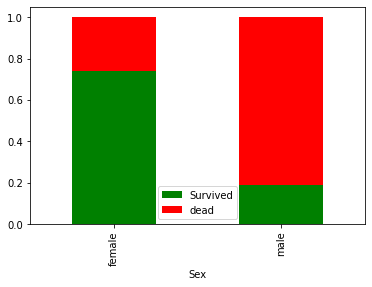

In [3]:
# lets get the visualisation of the data by plotting different graphs and figures
data['dead']=1-data['Survived']
data.groupby('Sex').mean()[['Survived','dead']].plot(kind='bar',stacked=True,colors=['g','r'])

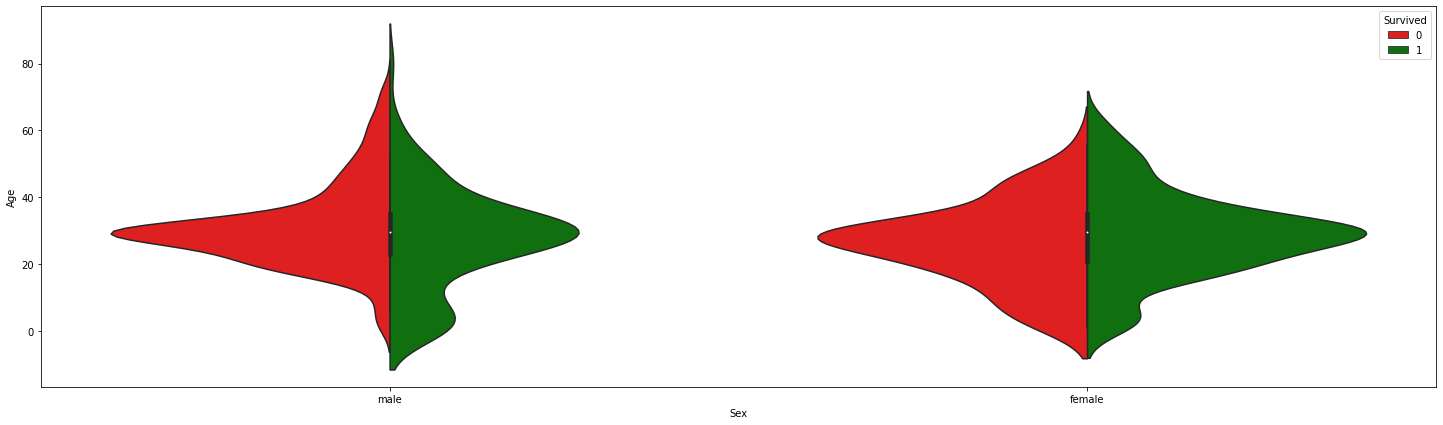

In [4]:
fig=plt.figure(figsize=(25,7))
sns.violinplot(x='Sex',y='Age',hue='Survived',data=data,split=True,palette={0:'r',1:'g'})


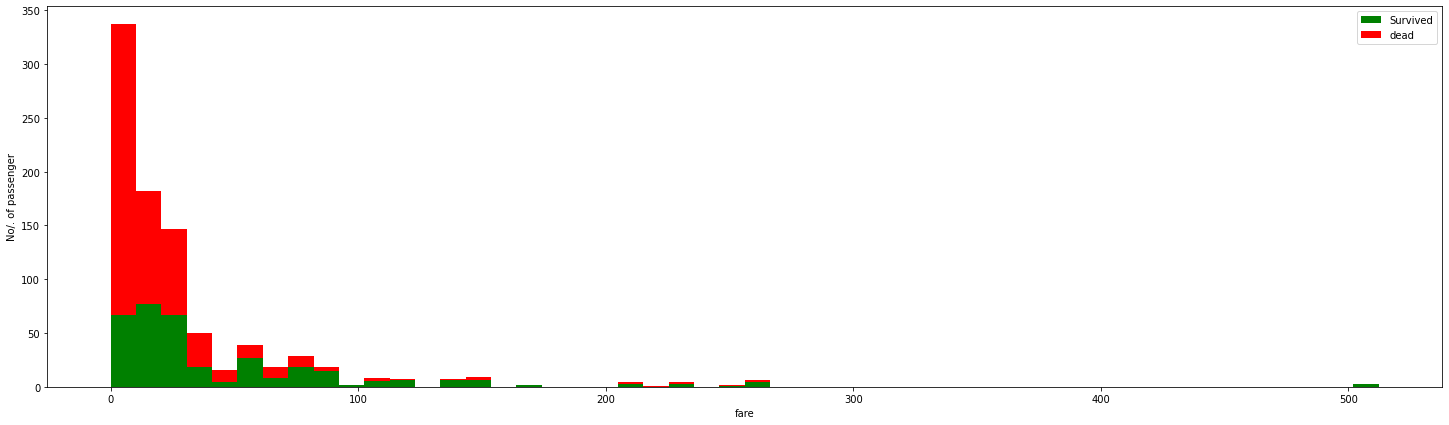

In [5]:
figure=plt.figure(figsize=(25,7))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']]
         ,stacked=True,color=['g','r'],
         bins=50,label=['Survived','dead'])
plt.xlabel('fare')
plt.ylabel('No/. of passenger')
plt.legend()

## lets combine the age survived and fare


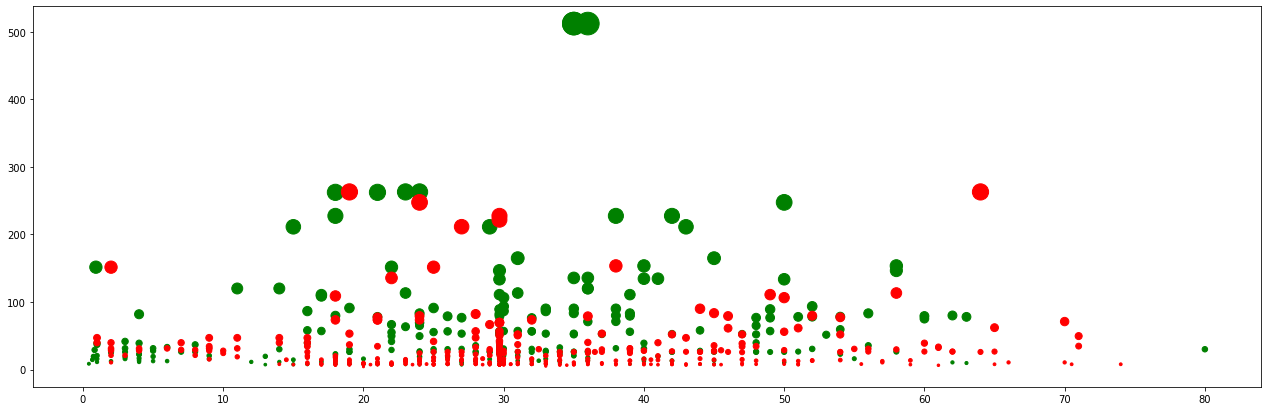

In [6]:
plt.figure(figsize=(22,7))
ax=plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='green',s=data[data['Survived']==1]['Fare'])
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red',s=data[data['Survived']==0]['Fare'])

In [7]:
#Fare corelates with the class below

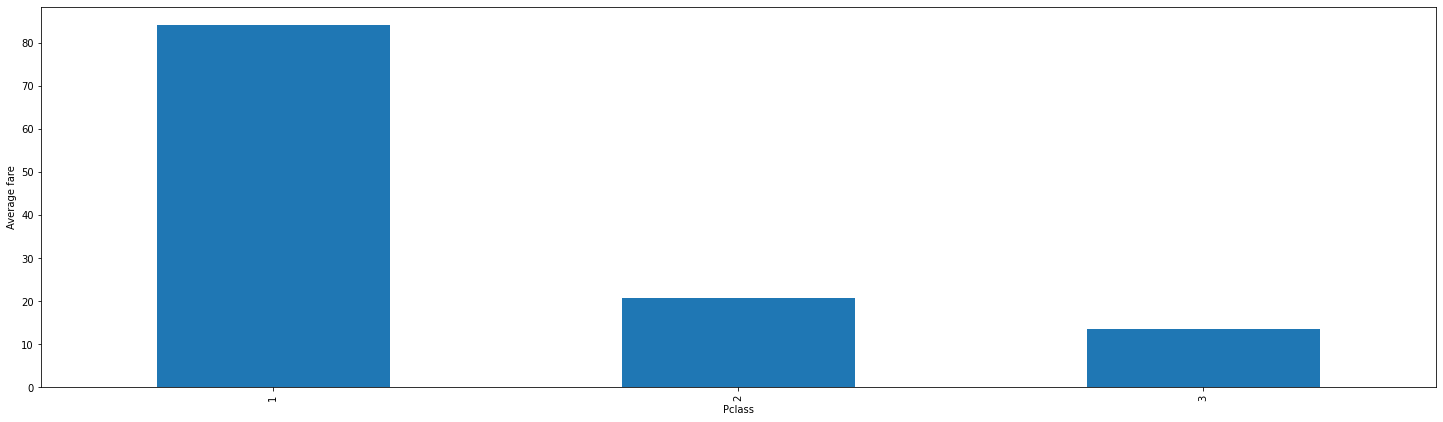

In [8]:
ax=plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(25,7))

In [9]:
#similarly see the embarkation sideeffect 

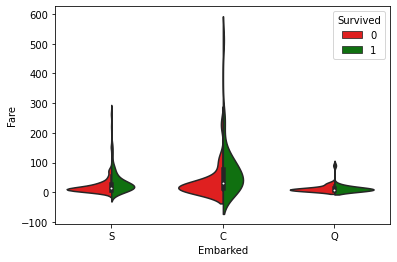

In [10]:
fig=plt.figure()
sns.violinplot(x='Embarked',y='Fare',hue='Survived',data=data,split=True,palette={0:'r',1:'g'})

**Feature Engineering**********
extracting the passengers title

In [11]:
def get_combined_data():
    train=pd.read_csv("/kaggle/input/titanic/train.csv")
    test=pd.read_csv("/kaggle/input/titanic/test.csv")
    targets=train.Survived
    train.drop(['Survived'],1,inplace=True)
    combined=train.append(test)
    combined.reset_index(inplace=True)
  
    return combined
combined=get_combined_data()



In [12]:
titles=set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
title_dict={
    "Lady":"Royality",
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master"
           }
def get_titles():
    combined['Title']=combined['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
    combined['Title']=combined.Title.map(title_dict)

    return combined
combined=get_titles()
print(combined.head)
    

<bound method NDFrame.head of       index  PassengerId  Pclass  \
0         0            1       3   
1         1            2       1   
2         2            3       3   
3         3            4       1   
4         4            5       3   
...     ...          ...     ...   
1304    413         1305       3   
1305    414         1306       1   
1306    415         1307       3   
1307    416         1308       3   
1308    417         1309       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...  

In [13]:
# Processing Ages
#print(combined.iloc[:891].Age.isnull().sum())
#print(combined.iloc[891:].Age.isnull().sum())
grouped_train=combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_train_median=grouped_train.median()
grouped_train_median=grouped_train_median.reset_index()[['Sex','Pclass','Title','Age']]
print(grouped_train_median.head())
def fillage(row):
    condition=(grouped_train_median['Sex']==row['Sex'])&(grouped_train_median['Title']==row['Title'])&(grouped_train_median['Pclass']==row['Pclass'])
    return grouped_train_median[condition]['Age'].values[0]
def process_age():
    global combined
    combined['Age']=combined.apply(lambda row:fillage(row) if np.isnan(row['Age']) else row['Age'],axis=1)
    return combined
combined=process_age()
print(combined['Age'].isnull)


      Sex  Pclass     Title   Age
0  female       1      Miss  30.0
1  female       1       Mrs  40.0
2  female       1   Officer  49.0
3  female       1  Royality  48.0
4  female       1   Royalty  33.0
<bound method Series.isnull of 0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    26.0
1305    39.0
1306    38.5
1307    26.0
1308     4.0
Name: Age, Length: 1309, dtype: float64>


 **Prcoess name**

In [14]:
def evaluate_name():
    global combined
    combined.drop('Name',axis=1,inplace=True)
    dummies=pd.get_dummies(combined['Title'],prefix='Title')
    combined=pd.concat([combined,dummies],axis=1)
    combined.drop('Title',inplace=True,axis=1)
    return combined
combined=evaluate_name()
print(combined.head())


   index  PassengerId  Pclass     Sex   Age  SibSp  Parch            Ticket  \
0      0            1       3    male  22.0      1      0         A/5 21171   
1      1            2       1  female  38.0      1      0          PC 17599   
2      2            3       3  female  26.0      0      0  STON/O2. 3101282   
3      3            4       1  female  35.0      1      0            113803   
4      4            5       3    male  35.0      0      0            373450   

      Fare Cabin Embarked  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0   7.2500   NaN        S             0           0         1          0   
1  71.2833   C85        C             0           0         0          1   
2   7.9250   NaN        S             0           1         0          0   
3  53.1000  C123        S             0           0         0          1   
4   8.0500   NaN        S             0           0         1          0   

   Title_Officer  Title_Royality  Title_Royalty  
0              0  

**process Sex**

In [15]:
def processsex():
    global combined
    combined['Sex']=combined['Sex'].map({'male':1,'female':0})
    return combined
combined=processsex()
print(combined.head())

   index  PassengerId  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0      0            1       3    1  22.0      1      0         A/5 21171   
1      1            2       1    0  38.0      1      0          PC 17599   
2      2            3       3    0  26.0      0      0  STON/O2. 3101282   
3      3            4       1    0  35.0      1      0            113803   
4      4            5       3    1  35.0      0      0            373450   

      Fare Cabin Embarked  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0   7.2500   NaN        S             0           0         1          0   
1  71.2833   C85        C             0           0         0          1   
2   7.9250   NaN        S             0           1         0          0   
3  53.1000  C123        S             0           0         0          1   
4   8.0500   NaN        S             0           0         1          0   

   Title_Officer  Title_Royality  Title_Royalty  
0              0               0    

**Process Fare**

In [16]:
def Processfare():
    global combined
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(),inplace=True)
    return combined
combined=Processfare()
print(combined['Fare'].isnull)

<bound method Series.isnull of 0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64>


**Processing Embarked**

In [17]:
def Process_embarked():
    global combined
    combined.Embarked.fillna('S',inplace=True)
    dummies=pd.get_dummies(combined['Embarked'],prefix='embark')
    combined=pd.concat([combined,dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    return combined
combined=Process_embarked()
print(combined.head())

   index  PassengerId  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0      0            1       3    1  22.0      1      0         A/5 21171   
1      1            2       1    0  38.0      1      0          PC 17599   
2      2            3       3    0  26.0      0      0  STON/O2. 3101282   
3      3            4       1    0  35.0      1      0            113803   
4      4            5       3    1  35.0      0      0            373450   

      Fare Cabin  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0   7.2500   NaN             0           0         1          0   
1  71.2833   C85             0           0         0          1   
2   7.9250   NaN             0           1         0          0   
3  53.1000  C123             0           0         0          1   
4   8.0500   NaN             0           0         1          0   

   Title_Officer  Title_Royality  Title_Royalty  embark_C  embark_Q  embark_S  
0              0               0              0         0   

**processing cabin******

In [18]:
train_cabin,test_cabin=set(),set()
for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')        
print(train_cabin)
print(test_cabin)
def processcabin():
    global combined
    combined.Cabin.fillna('U',inplace=True)
    combined['Cabin']=combined['Cabin'].map(lambda c:c[0])
    dummy=pd.get_dummies(combined['Cabin'],prefix='Cabin')
    combined=pd.concat([combined,dummy],axis=1)
    combined.drop('Cabin',axis=1,inplace=True)
    return combined
combined=processcabin()
print(combined.head())

{'E', 'F', 'G', 'D', 'T', 'B', 'C', 'A', 'U'}
{'E', 'F', 'G', 'D', 'B', 'C', 'A', 'U'}
   index  PassengerId  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0      0            1       3    1  22.0      1      0         A/5 21171   
1      1            2       1    0  38.0      1      0          PC 17599   
2      2            3       3    0  26.0      0      0  STON/O2. 3101282   
3      3            4       1    0  35.0      1      0            113803   
4      4            5       3    1  35.0      0      0            373450   

      Fare  Title_Master  ...  embark_S  Cabin_A  Cabin_B  Cabin_C  Cabin_D  \
0   7.2500             0  ...         1        0        0        0        0   
1  71.2833             0  ...         0        0        0        1        0   
2   7.9250             0  ...         1        0        0        0        0   
3  53.1000             0  ...         1        0        0        1        0   
4   8.0500             0  ...         1        0        0    

**Processing Pclasss**

In [19]:
def processingPclass():
    global combined
    dummy=pd.get_dummies(combined['Pclass'],prefix='Class')
    combined.drop('Pclass',axis=1,inplace=True)
    combined=pd.concat([combined,dummy],axis=1)
    return combined
combined=processingPclass()
print(combined.head())


   index  PassengerId  Sex   Age  SibSp  Parch            Ticket     Fare  \
0      0            1    1  22.0      1      0         A/5 21171   7.2500   
1      1            2    0  38.0      1      0          PC 17599  71.2833   
2      2            3    0  26.0      0      0  STON/O2. 3101282   7.9250   
3      3            4    0  35.0      1      0            113803  53.1000   
4      4            5    1  35.0      0      0            373450   8.0500   

   Title_Master  Title_Miss  ...  Cabin_C  Cabin_D  Cabin_E  Cabin_F  Cabin_G  \
0             0           0  ...        0        0        0        0        0   
1             0           0  ...        1        0        0        0        0   
2             0           1  ...        0        0        0        0        0   
3             0           0  ...        1        0        0        0        0   
4             0           0  ...        0        0        0        0        0   

   Cabin_T  Cabin_U  Class_1  Class_2  Class_3  
0

**Processing Ticket**

In [20]:
def filterticket(ticket):
    ticket=ticket.replace('/','')
    ticket=ticket.replace('.','')
    ticket=ticket.split()
    ticket=map(lambda t: t.strip(), ticket)
    ticket=list(filter(lambda t:  not t.isdigit(),ticket))
    if (len(ticket)>0):
        return ticket[0]
    else:
        return 'XXX'
tickets=set()    
for t in combined['Ticket']:
    tickets.add(filterticket(t))
print(tickets)    
def processtickets():
    global combined
    def filterticket(ticket):
        ticket=ticket.replace('/','')
        ticket=ticket.replace('.','')
        ticket=ticket.split()
        ticket=map(lambda t: t.strip(), ticket)
        ticket=list(filter(lambda t:  not t.isdigit(),ticket))
        if (len(ticket)>0):
            return ticket[0]
        else:
            return 'XXX' 
    combined['Ticket']=combined['Ticket'].map(filterticket)
    dummy=pd.get_dummies(combined['Ticket'],prefix='Ticket')

    combined.drop('Ticket',axis=1,inplace=True)
    combined=pd.concat([combined,dummy],axis=1)
    return combined
combined=processtickets()
print(combined.head())
    
    
    

{'SCPARIS', 'A5', 'C', 'STONO2', 'XXX', 'SCA3', 'STONO', 'SC', 'LINE', 'CA', 'STONOQ', 'WEP', 'SWPP', 'FC', 'A', 'SOTONO2', 'SCA4', 'A4', 'Fa', 'FCC', 'SOC', 'SCParis', 'SCOW', 'PPP', 'CASOTON', 'SOPP', 'SOP', 'AQ4', 'LP', 'AS', 'PP', 'SP', 'SCAH', 'SOTONOQ', 'PC', 'AQ3', 'WC'}
   index  PassengerId  Sex   Age  SibSp  Parch     Fare  Title_Master  \
0      0            1    1  22.0      1      0   7.2500             0   
1      1            2    0  38.0      1      0  71.2833             0   
2      2            3    0  26.0      0      0   7.9250             0   
3      3            4    0  35.0      1      0  53.1000             0   
4      4            5    1  35.0      0      0   8.0500             0   

   Title_Miss  Title_Mr  ...  Ticket_SOTONO2  Ticket_SOTONOQ  Ticket_SP  \
0           0         1  ...               0               0          0   
1           0         0  ...               0               0          0   
2           1         0  ...               0             

Process Family

In [21]:
def Processfamily():
    global combined
    combined['Familysize']=combined['SibSp']+combined['Parch']+1
    combined['Single']=combined['Familysize'].map(lambda s: 1 if s==1 else 0)
    combined['Small']=combined['Familysize'].map(lambda s: 1 if s>=2 and s<=4 else 0)
    combined['big']=combined['Familysize'].map(lambda s: 1 if s>4  else 0)
    return combined
combined=Processfamily()
combined.drop('SibSp',axis=1,inplace=True)
combined.drop('Parch',axis=1,inplace=True)
print(combined.head())
    

   index  PassengerId  Sex   Age     Fare  Title_Master  Title_Miss  Title_Mr  \
0      0            1    1  22.0   7.2500             0           0         1   
1      1            2    0  38.0  71.2833             0           0         0   
2      2            3    0  26.0   7.9250             0           1         0   
3      3            4    0  35.0  53.1000             0           0         0   
4      4            5    1  35.0   8.0500             0           0         1   

   Title_Mrs  Title_Officer  ...  Ticket_STONO2  Ticket_STONOQ  Ticket_SWPP  \
0          0              0  ...              0              0            0   
1          1              0  ...              0              0            0   
2          0              0  ...              1              0            0   
3          1              0  ...              0              0            0   
4          0              0  ...              0              0            0   

   Ticket_WC  Ticket_WEP  Ticket_XXX  

> Modeling

In [22]:
# 1. breaking the train and test from combined data
def recovery():
    global combined
    target=pd.read_csv("/kaggle/input/titanic/train.csv",usecols=['Survived'])['Survived'].values
    train=combined.iloc[:891]
    test=combined.iloc[891:]
    return train,test,target
train,test,target=recovery()
    

In [23]:
#2 we import all the necessary libraries
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [24]:
clf=RandomForestClassifier(n_estimators=50,max_features='sqrt')
clf=clf.fit(train,target)

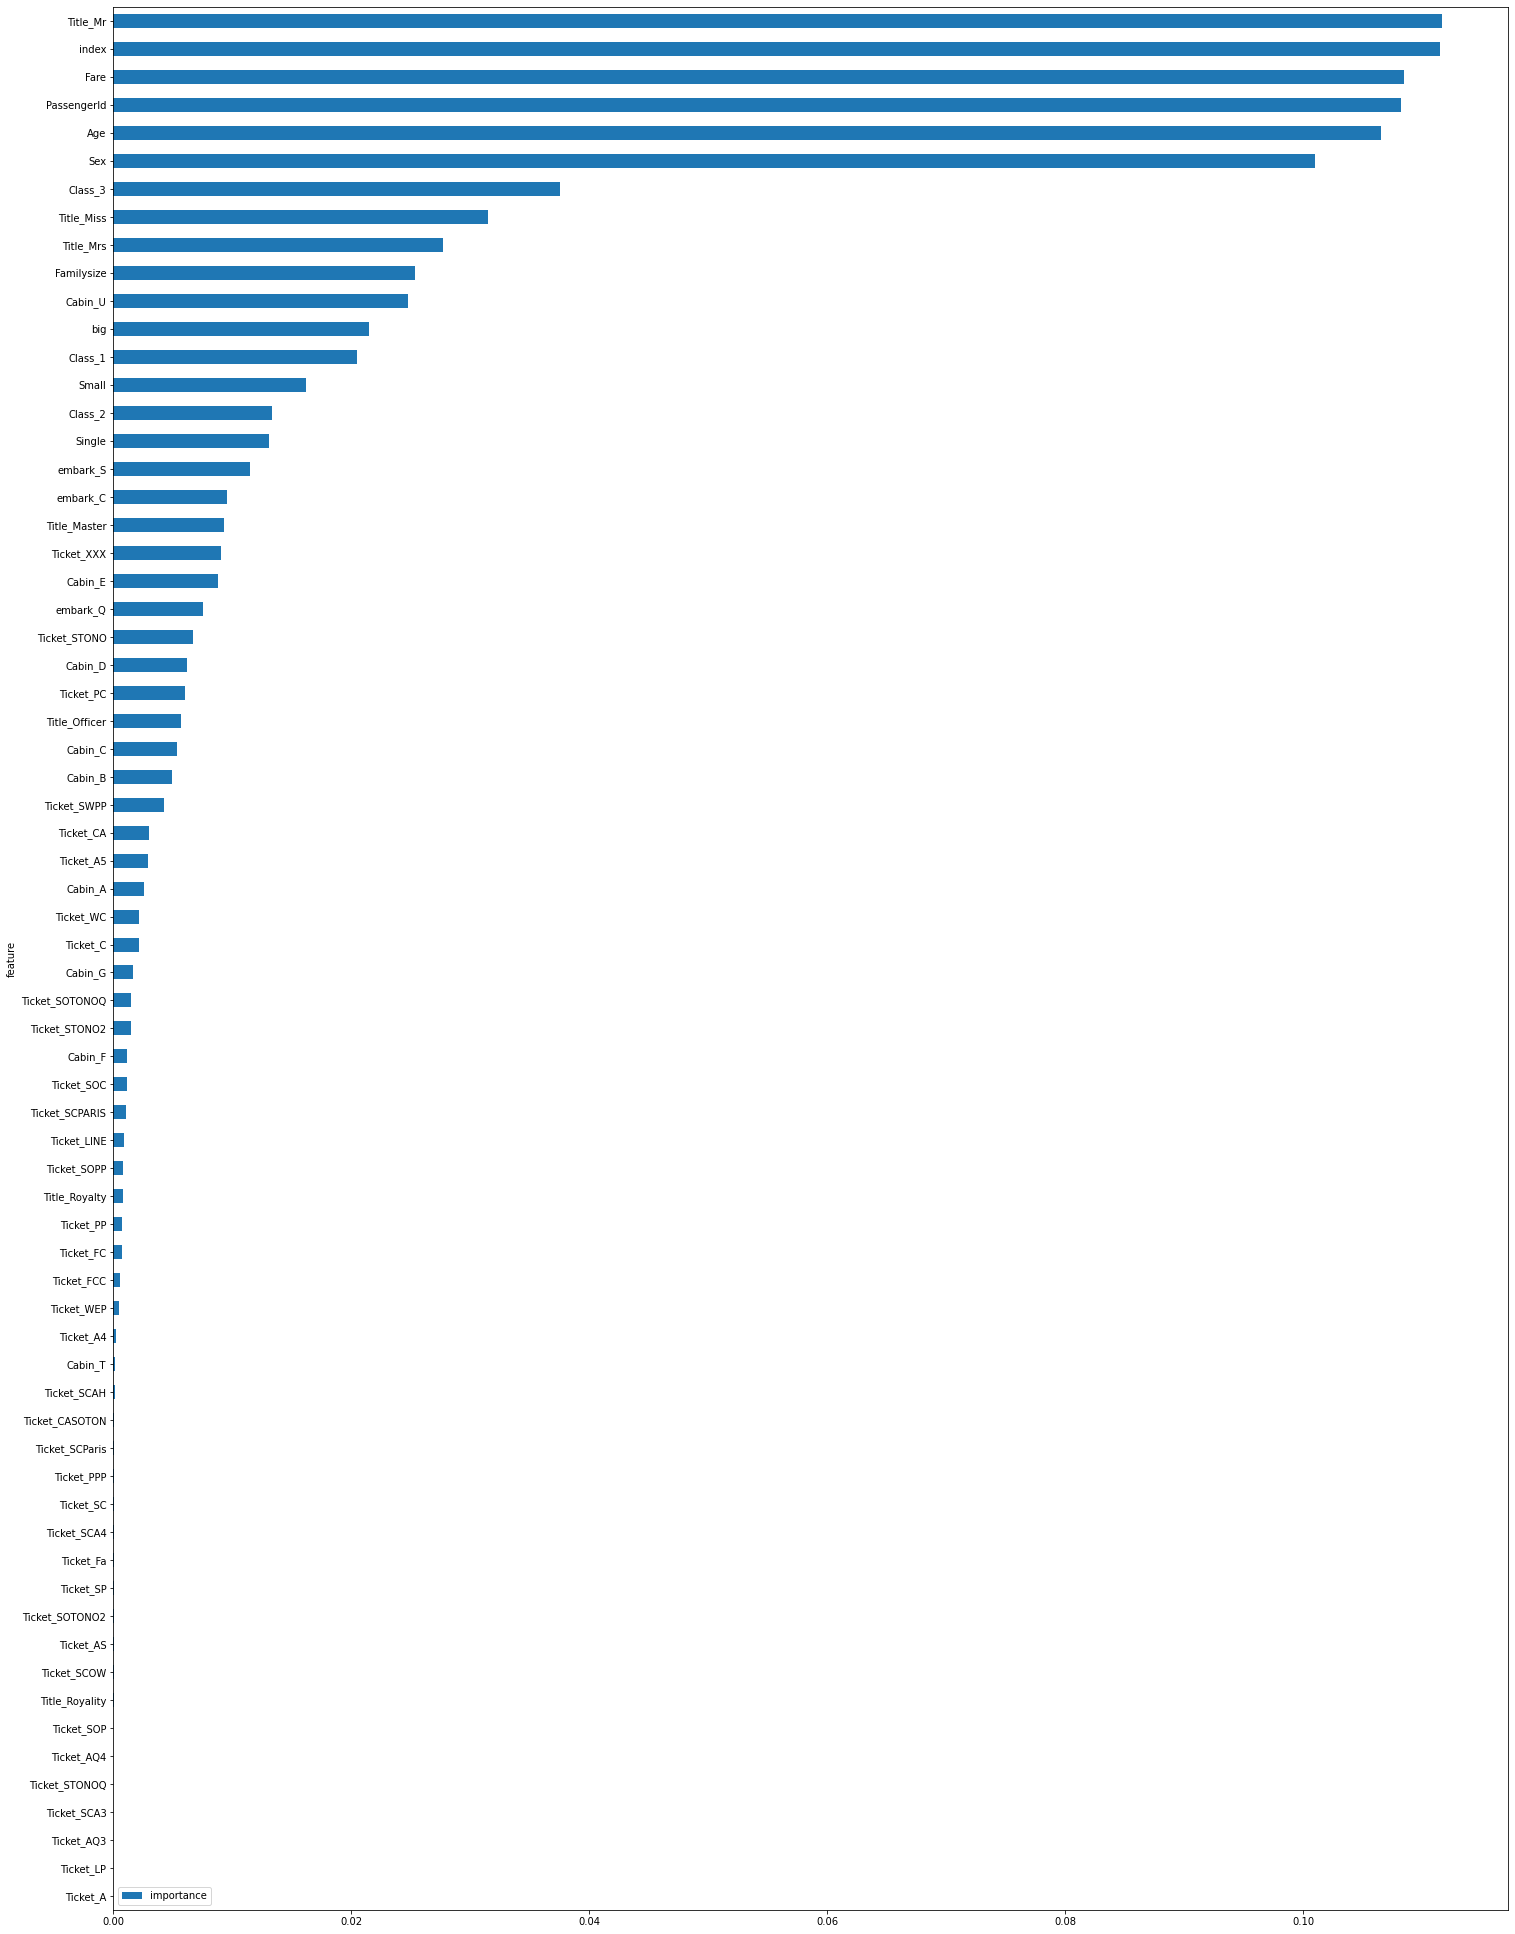

In [25]:
features=pd.DataFrame()
features['feature']=train.columns
features['importance']=clf.feature_importances_
features.sort_values(by=['importance'],ascending=True,inplace=True)
features.set_index('feature',inplace=True)
features.plot(kind='barh',figsize=(25,35))

In [26]:
model=SelectFromModel(clf,prefit=True)
train_reduced=model.transform(train)
print(train_reduced.shape)
test_reduced=model.transform(test)
print(test_reduced.shape)

(891, 14)
(418, 14)


In [27]:
#3 lets try different models
def compute_score(clf,x,y,scoring='accuracy'):
    xval=cross_val_score(clf,x,y,cv=5,scoring=scoring)
    return np.mean(xval)

logreg=LogisticRegression()
logregcv=LogisticRegressionCV()
rf=RandomForestClassifier()
gboost=GradientBoostingClassifier()
models=[logreg,logregcv,rf,gboost]
for model in models:
    print("cross validation of:{0}".format(model.__class__))
    score=compute_score(clf=model,x=train_reduced,y=target,scoring='accuracy')
    print("cv score{0}".format(score))


cross validation of:<class 'sklearn.linear_model._logistic.LogisticRegression'>


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


cv score0.8125729709371665
cross validation of:<class 'sklearn.linear_model._logistic.LogisticRegressionCV'>


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


cv score0.8237712635741635
cross validation of:<class 'sklearn.ensemble._forest.RandomForestClassifier'>
cv score0.8003326847027807
cross validation of:<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
cv score0.7880672901889397


In [28]:
#turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, target)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, target)

In [35]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('/kaggle/input/titanic/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('submission_test.csv', index=False)


In [ ]:
check_submission = pd.read_csv('submission_test.csv')
print(check_submission)